# Reading License Plate Numbers with Google Tesseract

*Objective:* Using the generated YOLO and COCO bounding boxes, write a function that crops the license-plate-only portion of the image as indicated by the ground truth bounding boxes. Display the original image and the output. Then, write a function using Google's Tesseract OCR (pytesseract) that takes in a cropped image and returns the license plate number as a string.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from data_pipeline import DataPipeline
from PIL import Image
import pytesseract as tess  # for OCR

import icecream as ic  # for debugging

%matplotlib inline

As part of the DataPipeline class, I've already written class methods that take PASCAL VOC format bounding box annotations (XML file) and convert the bounding box coordinates to YOLO format (TXT file) and COCO format (TXT file). 

PASCAL VOC bounding box coordinates are in the following format: 
__[x_min, y_min, x_max, y_max]__
* (x_min, y_min) are the coordinates of the top-left corner of the bounding box
* (x_max, y_max) are the coordinates of the bottom-right corner of the bounding box

YOLO bounding box coordinates are in the following format:
__[x_center, y_center, width, height]__
* (x_center, y_center) are the normalized coordinates of the center of the bounding box
* width and height are the normalized lengths of the bounding box

COCO bounding box coordinates are in the following format:
__[x_min, y_min, width, height]__
* (x_min, y_min) are the coordinates of the top-left corner of the bounding box
* width and height are the respective dimensions of the bounding box

Specifying the size of the image is very important for correctly converting from PASCAL VOC to YOLO or COCO format, since the coordinates need to be normalized. 


## Produce YOLO formatted annotations

I will now sequentially parse all the PASCAL VOC annotation format .xml files in the `images` directory and produce the COCO formatted annotations. 

YOLO formatted annotations are typically saved as .txt files. 

In [2]:
def convert_xml_to_yolo(directory):
    pipeline = DataPipeline()
    xml_files = [file for file in os.listdir(directory) if file.endswith('.xml')]
    
    for xml_file in xml_files:
        xml_path = os.path.join(directory, xml_file)
        pipeline.convert_pascal_to_yolo_format(xml_path)

In [3]:
convert_xml_to_yolo('./images')

## Produce COCO formatted annotations

I will now sequentially parse all the PASCAL VOC annotation format .xml files in the `images` directory and produce the COCO formatted annotations. 

I will be saving the COCO formatted annotations as .txt files, but they can also be saved as JSON files. 

In [4]:
def convert_xml_to_coco(directory):
    pipeline = DataPipeline()
    xml_files = [file for file in os.listdir(directory) if file.endswith('.xml')]
    
    for xml_file in xml_files:
        xml_path = os.path.join(directory, xml_file)
        pipeline.convert_pascal_to_coco_format(xml_path)

In [5]:
convert_xml_to_coco('./images')

<div class="alert alert-success">
Currently only saving YOLO and COCO annotations for one image each. 

Attempted to modify class methods in the `data_pipeline` module to save reformatted annotations as separate text files with filenames based off of the input filenames -> Reran Jupyter notebook, still only saving one file each. 

Need to debug this further.
</div>

## Crop Input Image Using YOLO and COCO Bounding Boxes

In [8]:
def crop_image_with_yolo_annotations(image_path, annotations_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Read the YOLO format bounding box annotations file
    with open(annotations_path, 'r') as file:
        annotations = file.readlines()
    
    # Iterate over each annotation
    for annotation in annotations:
        # Parse the annotation values
        values = annotation.strip().split(' ')
        x_center = float(values[0])
        y_center = float(values[1])
        width = float(values[2])
        height = float(values[3])
        
        # Calculate the bounding box coordinates
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])
        
        # Crop the image using the bounding box coordinates
        cropped_image = image[y_min:y_max, x_min:x_max]
        
        # Display the original and cropped images
        # cv2.imshow('Original Image', image)
        # cv2.imshow('Cropped Image', cropped_image)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

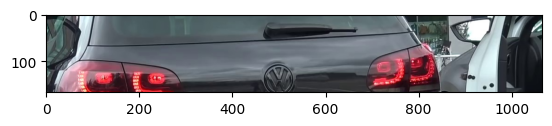

In [7]:
crop_image_with_yolo_annotations(image_path='./images/N1.jpeg', annotations_path='yolo_annotations.txt')

## Use Cropped Images as Inputs for Tesseract OCR